# Tugas 2

# Fari Qodri Andana - 1606875964 - DSA C

## Data hr_data.csv

### 1. Visualisasikan seluruh atribut data dengan menggunakan histogram, bagaimana sebaran data? apakah semua menyebar normal? jelaskan

In [32]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={"figure.figsize": (15,5)})

In [33]:
hr_data = pd.read_csv("dataset/hr_data.csv")

#### Satisfaction Level

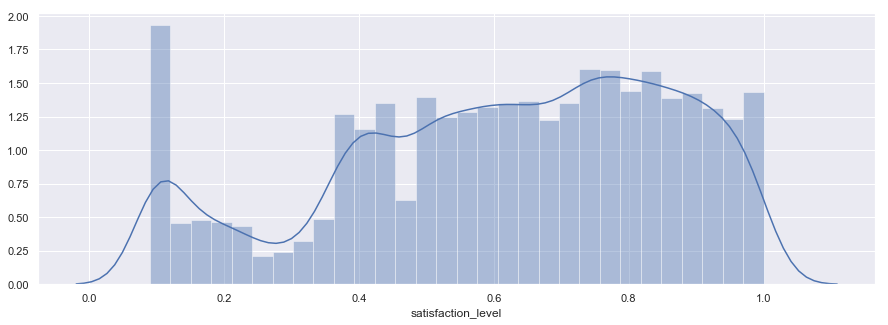

In [34]:
sns.distplot(hr_data['satisfaction_level'].dropna())

#### Last Evaluation

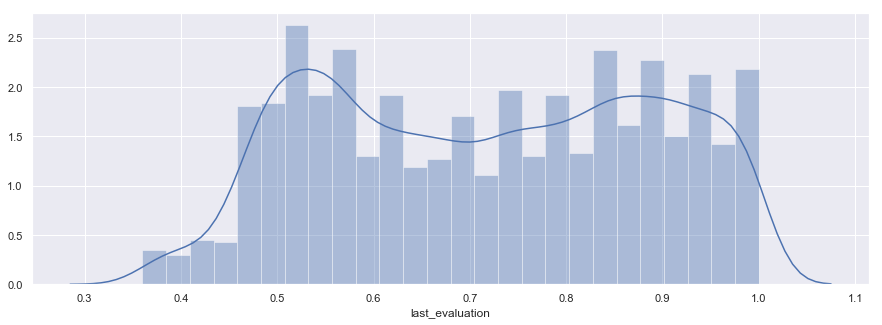

In [35]:
sns.distplot(hr_data['last_evaluation'].dropna())

#### Number Project

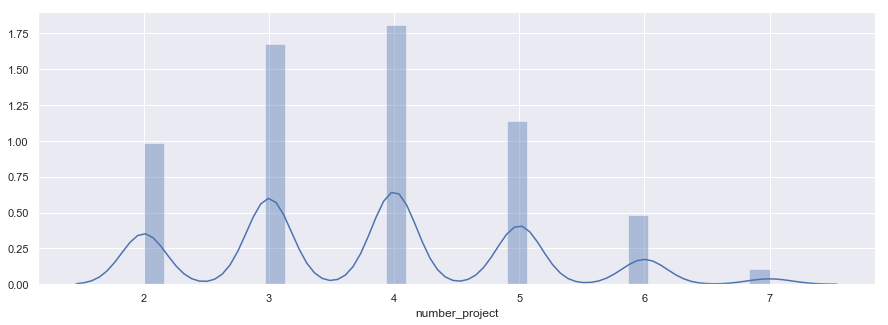

In [36]:
sns.distplot(hr_data['number_project'].dropna())

#### Average Monthly Hours

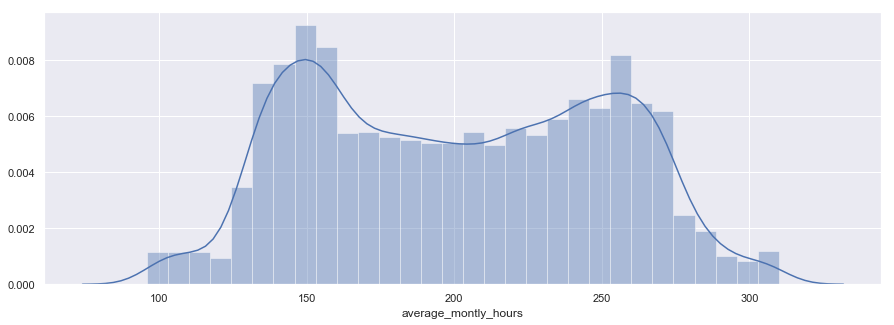

In [37]:
sns.distplot(hr_data['average_montly_hours'].dropna())

#### Time Spend Company

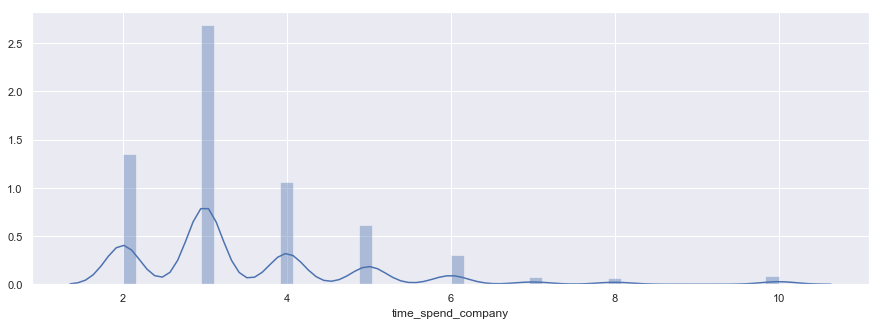

In [38]:
sns.distplot(hr_data['time_spend_company'].dropna())

#### Work Accident

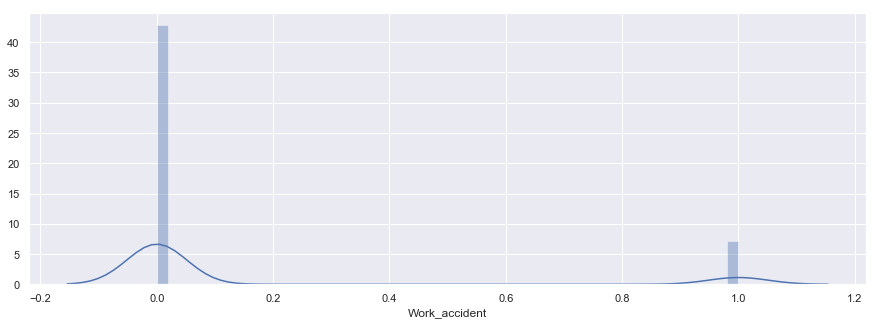

In [39]:
sns.distplot(hr_data['Work_accident'].dropna())

#### Left

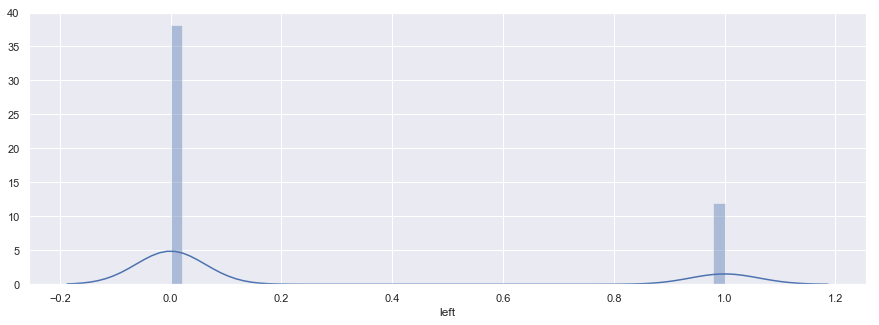

In [40]:
sns.distplot(hr_data['left'].dropna())

#### Promotion Last 5 Years

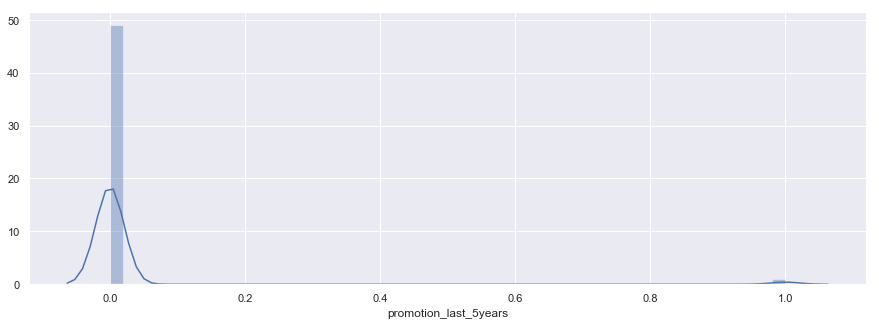

In [41]:
sns.distplot(hr_data['promotion_last_5years'].dropna())

#### Sales

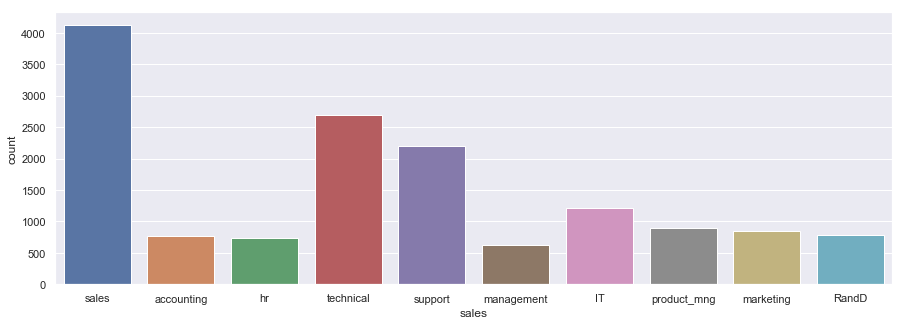

In [42]:
sns.countplot(data=hr_data, x="sales")

#### Salary

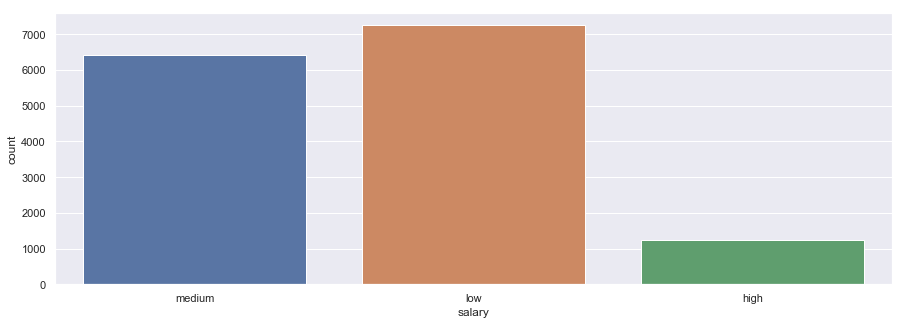

In [43]:
sns.countplot(data=hr_data, x="salary")

##### Tidak semua data terdistribusi normal, contoh yang tidak terdistribusi normal adalah satifaction_level

### 2. Temukan outlier pada setiap atribut, anda dapat menggunakan boxplot atau teknik visualisasi lain

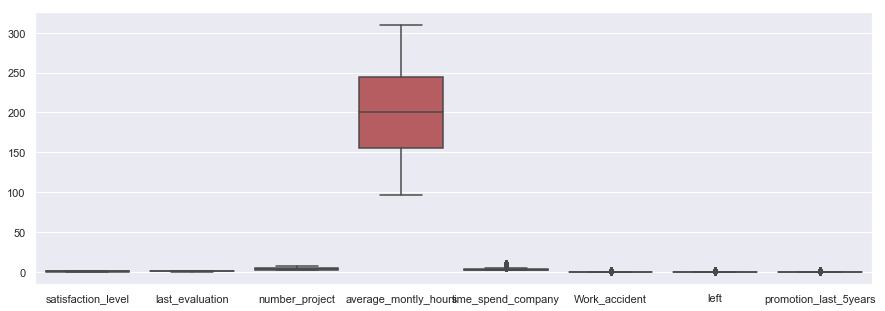

In [44]:
sns.boxplot(data=hr_data)

### 3. Pisahkan feature dan label (‘left’) ke dalam masing-masing variabel x dan y. Kemudian bagi menjadi 70% data training dan 30% data testing. Proses selanjutnya gunakan hanya data training.

In [45]:
from sklearn.model_selection import train_test_split
hr_data_splitted = hr_data.copy()
train, test = train_test_split(hr_data_splitted, test_size=0.3)

y_train = train.pop("left")
x_train = train.copy()

y_test = test.pop("left")
x_test = test.copy()

### 4. Lakukan pengisian data yang kosong (missing value) pada setiap atribut, gunakan nilai median untuk atribut numerical dan “KOSONG” untuk atribut categorical.

In [46]:
def fillnan(data):
    res = data.copy()
    for c in data:
        curr = data[c]
        if curr.isna().sum() > 0:
            if curr.dtype == "float64" or curr.dtype == "int64":
                median = curr.median(skipna=True)
                res[c] = curr.fillna(median)
            else:
                res[c] = curr.fillna("KOSONG")
    return res

In [47]:
x_train = fillnan(x_train)
x_test = fillnan(x_test)

### 5. Buatlah variabel dummies (Kita tidak bisa memasukan data categorical, jika tidak diubah menjadi numerical) pada setiap atribut categorical. Gunakan fungsi pd.get_dummies dan gabungkan hasilnya dengan atribut numerical.

In [48]:
x_train = pd.get_dummies(x_train)
x_train = x_train.astype("float64")

x_test = pd.get_dummies(x_test)
x_test = x_test.astype("float64")

In [49]:
all_features = x_train.columns.values

### 6. Lakukan normalisasi semua atribut dengan zscore menggunakan fungsi StandardScaler.

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### 7. Lakukan klasifikasi dengan LogisticRegression, RandomForestClassifier, dan AdaBoostClassifier tanpa mengubah parameter fungsi. Prediksi label data testing, apakah akurasi yang didapat telah mengalahkan benchmark (porsi label terbesar)?

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(x_train, y_train)
random_forest = RandomForestClassifier().fit(x_train, y_train)
ada = AdaBoostClassifier().fit(x_train, y_train)

/anaconda3/envs/dsa/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/dsa/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [53]:
log_res = logistic.predict(x_test)

In [54]:
rand_res = random_forest.predict(x_test)

In [55]:
ada_res = ada.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_res))
print("Random Forest Accuracy: ", accuracy_score(y_test, rand_res))
print("Ada Booster Classifier Accuracy: ", accuracy_score(y_test, ada_res))

Logistic Regression Accuracy:  0.7904444444444444
Random Forest Accuracy:  0.9771111111111112
Ada Booster Classifier Accuracy:  0.9535555555555556


### 8. Visualisasikan salah satu pohon estimator dan buatlah plot variable importance dari model RandomForestClassifier.

#### Pohon Estimator

In [27]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
tree = random_forest.estimators_[5]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)

In [28]:
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Variable Importance

Features Ranking:
1 feature satisfaction_level 0.25374354906098895
2 feature number_project 0.22541310806389975
3 feature average_montly_hours 0.20036832631090146
4 feature time_spend_company 0.15428563330450426
5 feature last_evaluation 0.09166316955736634
6 feature Work_accident 0.011664076693265673
7 feature salary_KOSONG 0.00911169018633736
8 feature salary_low 0.007983921092830719
9 feature sales_KOSONG 0.007700607858827738
10 feature salary_high 0.0062729091773662095
11 feature sales_sales 0.0041000017226336255
12 feature salary_medium 0.0037662780069435673
13 feature sales_support 0.003545328140547287
14 feature sales_technical 0.003383036785924741
15 feature sales_accounting 0.0026831151064420113
16 feature sales_RandD 0.0025391550793338125
17 feature sales_IT 0.0024401650248289646
18 feature promotion_last_5years 0.0022521568827911917
19 feature sales_management 0.002233970422256959
20 feature sales_product_mng 0.002076677857752805
21 feature sales_hr 0.0015753488164015439
22 

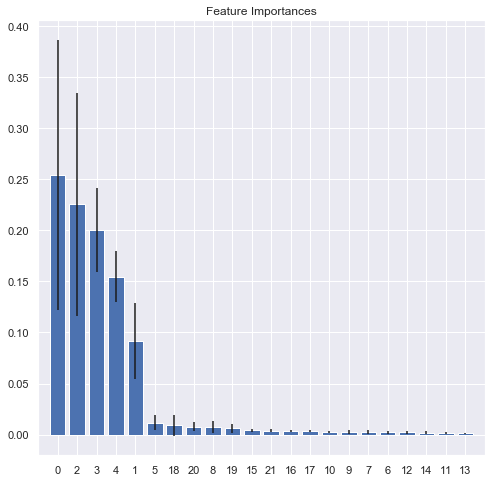

In [57]:
from matplotlib import pyplot as plt
import numpy as np

importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

indices = np.argsort(importances)[::-1]


print('Features Ranking:')

for f in range(x_train.shape[1]):
    print("{} feature {} {}".format(f+1, all_features[indices[f]], importances[indices[f]]))
    
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), importances[indices], color='b', yerr=std[indices], align='center')
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### 9. Lakukan hyperparameter tuning dengan fungsi GridSearchCV (tentukan sendiri hyperparameter yang menurut anda penting), terapkan cross validation dengan cv=5. Catat parameter terbaik dan akurasinya. Note: Ukuran data training dapat diperkecil jika proses ini berlangsung sangat lama.

In [474]:
print("Logistic params:", logistic.get_params())
print("Ada booster params:", ada.get_params())
print("Random forest params:", random_forest.get_params())

Logistic params: {'tol': 0.0001, 'max_iter': 100, 'warm_start': False, 'multi_class': 'warn', 'random_state': None, 'C': 1.0, 'fit_intercept': True, 'dual': False, 'class_weight': None, 'verbose': 0, 'penalty': 'l2', 'solver': 'warn', 'n_jobs': None, 'intercept_scaling': 1}
Ada booster params: {'base_estimator': None, 'n_estimators': 50, 'algorithm': 'SAMME.R', 'random_state': None, 'learning_rate': 1.0}
Random forest params: {'max_leaf_nodes': None, 'verbose': 0, 'min_samples_leaf': 1, 'min_impurity_split': None, 'warm_start': False, 'random_state': None, 'n_estimators': 10, 'oob_score': False, 'min_weight_fraction_leaf': 0.0, 'min_impurity_decrease': 0.0, 'class_weight': None, 'criterion': 'gini', 'min_samples_split': 2, 'max_features': 'auto', 'n_jobs': None, 'max_depth': None, 'bootstrap': True}


In [475]:
x_train, y_train = x_train[:3000], y_train[:3000]
x_test, y_test = x_test[:3000], y_test[:3000]

In [476]:
from sklearn.model_selection import GridSearchCV
import numpy as np

log_param_grid =  {
    "penalty": ["l1", "l2"],
    "solver": ["saga"]
}

log_hyper_param = GridSearchCV(estimator=logistic, param_grid=log_param_grid, cv=5)
log_hyper_param.fit(x_train, y_train)
y_pred_new = log_hyper_param.predict(x_test)
accuracy_score(y_test, y_pred_new)

/anaconda3/envs/dsa/lib/python3.5/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7963333333333333

In [477]:
rand_param_grid = {
    "n_estimators": list(range(10, 101, 10)),
    "max_features": list(range(6, 10, 2)),
    "max_depth": list(range(3,10,2))
}

rand_hyper_param = GridSearchCV(estimator=random_forest, param_grid=rand_param_grid, cv=5)
rand_hyper_param.fit(x_train, y_train)
y_pred_rand_new = rand_hyper_param.predict(x_test)
accuracy_score(y_test, y_pred_rand_new)

0.9716666666666667

In [478]:
ada_param_grid = {
    "n_estimators": list(range(10, 101, 10)),
    "learning_rate": list(np.arange(0.1, 1.0, 0.3))
}
ada_hyper_param = GridSearchCV(estimator=ada, param_grid=ada_param_grid, cv=5)
ada_hyper_param.fit(x_train, y_train)
y_pred_ada_new = ada_hyper_param.predict(x_test)
accuracy_score(y_test, y_pred_ada_new)

0.9556666666666667

----

***

## Gunakan data movies_metadata.csv

### 1. Buka data movies_metadata.csv. Drop rows dari index berikut: 19730, 29502, 35585. Apakah anda memerlukan reduksi dimensi pada data tersebut? Jika Iya, berapa jumlah fitur yang anda gunakan dan berapa jumlah fitur yang anda hilangkan?

In [59]:
import pandas as pd
import numpy as np

In [60]:
movies = pd.read_csv("dataset/movies_metadata.csv").drop([19730, 29502, 35585], axis=0)

/anaconda3/envs/dsa/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Jika dilihat dari banyaknya columns dan data yang disediakan saja, maka tidak dibutuhkan dimensiality reduction. Namun, ada beberapa feature yang dirasa kurang dibutuhkan dalam pengolahan data ini sehingga dapat dibuang.

### 2. Simpan semua atribut numerical ('budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count') dan 'title' ke dalam dataframe baru. Check deskripsi kolom ‘vote_count’ dengan fungsi describe() kemudian jelaskan output-nya

In [61]:
movies_new = movies.loc[:, ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'title']]

In [62]:
movies_new['vote_count'].describe()

count    45459.000000
mean       109.899734
std        491.315512
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

Column vote_count merupakan column yang memliki tipe data float64 yang melambangkan jumlah vote yang telah dilakukan terhadap film yang ada di record tersebut

### 3. Dari dataframe no 2, apakah anda memerlukan sampling pada data tersebut? Jika Iya berapa data sampling yang anda gunakan. Bagaimana perbedaan pengukuran statistic antara sampling data dan data keseluruhan (mean, median, dan standar deviasi).

In [65]:
movies_new["vote_count"].sample(n=2000, random_state=43).describe()

count     2000.000000
mean       104.497000
std        523.406878
min          0.000000
25%          3.000000
50%         10.000000
75%         33.000000
max      12114.000000
Name: vote_count, dtype: float64

### 4. Dari dataframe nomor 2, buang data yang memiliki nilai vote di bawah 30 dari kolom ‘vote_count’. Kemudian, lakukan normalisasi data dengan MinMaxScaler pada semua kolom selain kolom ‘title’. Kemudian lakukan clustering dengan menggunakan k-means . Carilah nilai k yang paling optimal dengan menggunakan pengukuran validitas internal (Boleh menggunakan selain yang di tutorial, contoh: Elbow curve).

In [484]:
movies_new = movies_new.loc[movies_new['vote_count'] < 30]

In [485]:
movies_no_title = movies_new.drop("title", axis=1).astype("float64")
columns = movies_no_title.columns.values

In [486]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
movies_new.loc[:, "budget":"vote_count"] = pd.DataFrame(mms.fit_transform(movies_no_title), columns=columns)
movies_new = fillnan(movies_new)

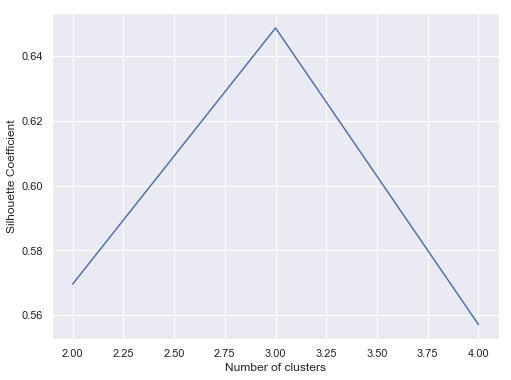

In [487]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

plt.figure(figsize=(8,6))
k_range = range(2, 5)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(movies_new.drop("title", axis=1))
    scores.append(metrics.silhouette_score(movies_new.drop("title", axis=1), km.labels_))
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Nilai K yang paling optimal adalah 3

### 5. Plot hasil clustering dengan ke dalam chart, contoh: bar plot, kemudian jelaskan hasilnya.

In [488]:
movies_no_title = movies_new.drop("title", axis=1)

In [489]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(movies_no_title)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

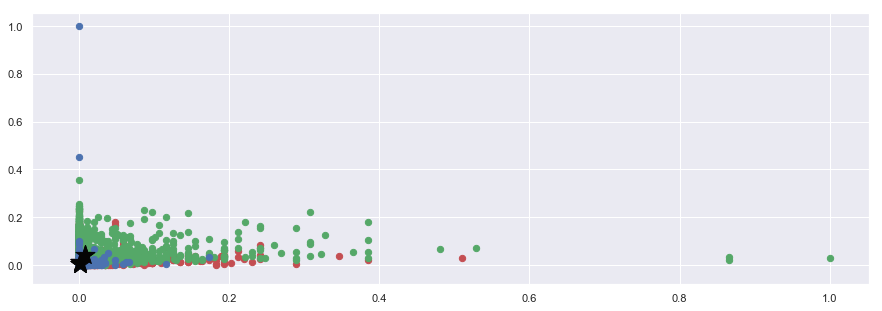

In [490]:
# Plot Centroid
colors = ['r', 'g', 'b']
k = 3
x_arr = movies_no_title.values
labels = km.labels_
centroids = km.cluster_centers_
for i in range(k):
    points = np.array([x_arr[j] for j in range(len(movies_no_title)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], s=40, c=colors[i])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=400,
c='#050505')
plt.show()

----

----

## Gunakan data pada Russian House Pricing

### 1. Buka file train.csv dengan parameter parse_dates=['timestamp'] pada fungsi pd.read_csv. Bandingkan hasil baca file jika tidak menggunakan parameter ini.

In [491]:
import pandas as pd

In [492]:
train_time = pd.read_csv("dataset/Russian House Price/train.csv", parse_dates=['timestamp'])

In [493]:
train_no_time = pd.read_csv("dataset/Russian House Price/train.csv")

In [494]:
train_time['timestamp'].describe()

count                   30471
unique                   1161
top       2014-12-16 00:00:00
freq                      160
first     2011-08-20 00:00:00
last      2015-06-30 00:00:00
Name: timestamp, dtype: object

In [495]:
train_no_time['timestamp'].describe()

count          30471
unique          1161
top       2014-12-16
freq             160
Name: timestamp, dtype: object

Jika menggunakan parse_dates, maka column timestamp akan dianggap sebagai object timestamp, sedangkan jika tidak menggunakan parameter tersebut, maka column timestamp akan dianggap sebagai object string biasa. Hal ini dapat mempermudah pengolahan data yang mengacu pada column tersebut, seperti sorting dan join on

### 2. Lakukan hal yang sama dengan tahap (1) menggunakan test.csv. Gabungkan kedua data train dan test dengan pd.concat. Merge data gabungan ini dengan macro.csv, gunakan pd.merge_ordered pada atribut ‘timestamp’.

In [496]:
test_time = pd.read_csv("dataset/Russian House Price/test.csv", parse_dates=['timestamp'])

In [497]:
test_no_time = pd.read_csv("dataset/Russian House Price/test.csv")

In [498]:
house_data = pd.concat([train_time, test_time], sort=False)

In [499]:
macro = pd.read_csv("dataset/Russian House Price/macro.csv", parse_dates=['timestamp'])

In [500]:
house_data = pd.merge_ordered(left=house_data, right=macro, on='timestamp')

### 3. Pisahkan feature dan label (‘price_doc’) ke dalam masing-masing variabel x dan y. Kemudian bagi menjadi 70% data training dan 30% data testing. Proses selanjutnya gunakan hanya data training.

In [501]:
from sklearn.model_selection import train_test_split

In [502]:
x, y = house_data.drop("price_doc", axis=1), house_data.loc[:,"price_doc"]

In [503]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### 4. Lakukan pengisian data yang kosong (missing value) pada setiap atribut, gunakan nilai median untuk atribut numerical dan “KOSONG” untuk atribut categorical.

In [504]:
import numpy as np
def change_certain_cols_to_float(col_list, data):
    for col in col_list:
        data[col] = data[col].str.replace(",",".")
        data.loc[data[col] == "#!", col] = np.nan
        print(col)
        data[col] = data[col].astype("float64")
    return data

In [505]:
cols = ['child_on_acc_pre_school', 'modern_education_share', 'old_education_build_share']
x_train = change_certain_cols_to_float(cols, x_train)

/anaconda3/envs/dsa/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/dsa/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/envs/dsa/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

child_on_acc_pre_school
modern_education_share
old_education_build_share


In [506]:
x_test = change_certain_cols_to_float(cols, x_test)

/anaconda3/envs/dsa/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


child_on_acc_pre_school


/anaconda3/envs/dsa/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


modern_education_share
old_education_build_share


In [507]:
x_train = fillnan(x_train)

In [508]:
x_test = fillnan(x_test)

### 5. Buatlah variabel dummies (Kita tidak bisa memasukan data categorical, jika tidak diubah menjadi numerical) pada setiap atribut categorical. Gunakan fungsi pd.get_dummies dan gabungkan hasilnya dengan atribut numerical

In [509]:
x_train = pd.get_dummies(x_train)

In [510]:
x_test = pd.get_dummies(x_test)

### 6. Lakukan normalisasi semua atribut dengan zscore menggunakan fungsi StandardScaler.

In [511]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [512]:
scaler = StandardScaler()
first = x_train.columns.values

In [513]:
x_train_no_time = x_train.drop("timestamp", axis=1)

In [514]:
x_train[x_train_no_time.columns.values] = scaler.fit_transform(x_train_no_time)
second = x_train.columns.values

/anaconda3/envs/dsa/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/dsa/lib/python3.5/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 7. Lakukan regresi dengan LinearRegression, Lasso, Ridge tanpa mengubah parameter fungsi. Prediksi label data testing dan hitung nilai MAE, RMSE dan SMAPE, apakah perbedaan ketiga matriks evaluasi ini?

In [515]:
x_train_no_time = x_train.drop("timestamp", axis=1)
y_train = y_train.fillna(y_train.dropna().median())

In [516]:
x_test_no_time = x_test.drop("timestamp", axis=1)
x_test[x_test_no_time.columns.values] = scaler.fit_transform(x_test_no_time)
x_test_no_time = x_test_no_time.reindex(columns=x_train_no_time.columns, fill_value=0)

/anaconda3/envs/dsa/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/dsa/lib/python3.5/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [517]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [518]:
lr = LinearRegression().fit(x_train_no_time, y_train)

In [519]:
y_pred_lr = lr.predict(x_test_no_time)

In [520]:
las = Lasso().fit(x_train_no_time, y_train)

/anaconda3/envs/dsa/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [521]:
rd = Ridge().fit(x_train_no_time, y_train)

In [522]:
y_pred_rd = rd.predict(x_test_no_time)

In [523]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [524]:
y_test = y_test.fillna(y_test.dropna().median())

### Nilai akurasi dari data hasil prediksi tidak dapat dihitung dengan benar karena:

1. Label untuk test dataset memiliki nilai NaN
2. Label untuk training dataset juga memiliki nilai NaN

### Hal ini menyebabkan saya harus mengisi nilai NaN dari kedua label tersebut, dimana pengisian nilai NaN dari label saya asumsikan menggunakan median. Namun hal tersebut merupakan hal yang sangat salah karena label seharusnya selalu benar